In [1]:
import requests

def wikipedia_page(title):
    '''
    This function returns the raw text of a wikipedia page 
    given a wikipedia page title
    '''
    params = { 
        'action': 'query', 
        'format': 'json', 
        'titles': title, 
        'prop': 'extracts', 
        'explaintext': True
    }
    response = requests.get(
         'https://en.wikipedia.org/w/api.php',
         params= params
     ).json()

    
    page = next(iter(response['query']['pages'].values()))
    if 'extract' in page.keys():
        return page['extract']
    else:
        return "Page not found"

In [7]:
import spacy


sp = spacy.load('en_core_web_sm')
text = wikipedia_page('Earth')
doc = sp(text)

for token in doc :
    print(token)

Earth
is
the
third
planet
from
the
Sun
and
the
only
astronomical
object
known
to
harbor
life
.
This
is
enabled
by
Earth
being
an
ocean
world
,
the
only
one
in
the
Solar
System
sustaining
liquid
surface
water
.
Almost
all
of
Earth
's
water
is
contained
in
its
global
ocean
,
covering
70.8
%
of
Earth
's
crust
.
The
remaining
29.2
%
of
Earth
's
crust
is
land
,
most
of
which
is
located
in
the
form
of
continental
landmasses
within
Earth
's
land
hemisphere
.
Most
of
Earth
's
land
is
somewhat
humid
and
covered
by
vegetation
,
while
large
sheets
of
ice
at
Earth
's
polar
deserts
retain
more
water
than
Earth
's
groundwater
,
lakes
,
rivers
and
atmospheric
water
combined
.
Earth
's
crust
consists
of
slowly
moving
tectonic
plates
,
which
interact
to
produce
mountain
ranges
,
volcanoes
,
and
earthquakes
.
Earth
has
a
liquid
outer
core
that
generates
a
magnetosphere
capable
of
deflecting
most
of
the
destructive
solar
winds
and
cosmic
radiation
.


Earth
has
a
dynamic
atmosphere
,
which
sustains
Earth

In [6]:
tokens = [token.text for token in doc]
print(tokens)

['Earth', 'is', 'the', 'third', 'planet', 'from', 'the', 'Sun', 'and', 'the', 'only', 'astronomical', 'object', 'known', 'to', 'harbor', 'life', '.', 'This', 'is', 'enabled', 'by', 'Earth', 'being', 'an', 'ocean', 'world', ',', 'the', 'only', 'one', 'in', 'the', 'Solar', 'System', 'sustaining', 'liquid', 'surface', 'water', '.', 'Almost', 'all', 'of', 'Earth', "'s", 'water', 'is', 'contained', 'in', 'its', 'global', 'ocean', ',', 'covering', '70.8', '%', 'of', 'Earth', "'s", 'crust', '.', 'The', 'remaining', '29.2', '%', 'of', 'Earth', "'s", 'crust', 'is', 'land', ',', 'most', 'of', 'which', 'is', 'located', 'in', 'the', 'form', 'of', 'continental', 'landmasses', 'within', 'Earth', "'s", 'land', 'hemisphere', '.', 'Most', 'of', 'Earth', "'s", 'land', 'is', 'somewhat', 'humid', 'and', 'covered', 'by', 'vegetation', ',', 'while', 'large', 'sheets', 'of', 'ice', 'at', 'Earth', "'s", 'polar', 'deserts', 'retain', 'more', 'water', 'than', 'Earth', "'s", 'groundwater', ',', 'lakes', ',', 'ri

In [8]:
for token in doc :
    print(token, token.is_space, token.is_punct, token.is_upper, token.is_digit)

Earth False False False False
is False False False False
the False False False False
third False False False False
planet False False False False
from False False False False
the False False False False
Sun False False False False
and False False False False
the False False False False
only False False False False
astronomical False False False False
object False False False False
known False False False False
to False False False False
harbor False False False False
life False False False False
. False True False False
This False False False False
is False False False False
enabled False False False False
by False False False False
Earth False False False False
being False False False False
an False False False False
ocean False False False False
world False False False False
, False True False False
the False False False False
only False False False False
one False False False False
in False False False False
the False False False False
Solar False False False False
System False Fals

In [9]:
# lemmarization
for token in doc :
    print(f"{token.text:>10}\t {token.lemma_}")

     Earth	 earth
        is	 be
       the	 the
     third	 third
    planet	 planet
      from	 from
       the	 the
       Sun	 Sun
       and	 and
       the	 the
      only	 only
astronomical	 astronomical
    object	 object
     known	 know
        to	 to
    harbor	 harbor
      life	 life
         .	 .
      This	 this
        is	 be
   enabled	 enable
        by	 by
     Earth	 Earth
     being	 be
        an	 an
     ocean	 ocean
     world	 world
         ,	 ,
       the	 the
      only	 only
       one	 one
        in	 in
       the	 the
     Solar	 Solar
    System	 System
sustaining	 sustain
    liquid	 liquid
   surface	 surface
     water	 water
         .	 .
    Almost	 almost
       all	 all
        of	 of
     Earth	 Earth
        's	 's
     water	 water
        is	 be
 contained	 contain
        in	 in
       its	 its
    global	 global
     ocean	 ocean
         ,	 ,
  covering	 cover
      70.8	 70.8
         %	 %
        of	 of
     Earth	 Earth
        's	 's
 

In [10]:
for token in doc : 
    print(f'{token.text}\t {token.pos_}')

Earth	 NOUN
is	 AUX
the	 DET
third	 ADJ
planet	 NOUN
from	 ADP
the	 DET
Sun	 PROPN
and	 CCONJ
the	 DET
only	 ADJ
astronomical	 ADJ
object	 NOUN
known	 VERB
to	 PART
harbor	 VERB
life	 NOUN
.	 PUNCT
This	 PRON
is	 AUX
enabled	 VERB
by	 ADP
Earth	 PROPN
being	 AUX
an	 DET
ocean	 NOUN
world	 NOUN
,	 PUNCT
the	 DET
only	 ADJ
one	 NUM
in	 ADP
the	 DET
Solar	 PROPN
System	 PROPN
sustaining	 VERB
liquid	 ADJ
surface	 NOUN
water	 NOUN
.	 PUNCT
Almost	 ADV
all	 PRON
of	 ADP
Earth	 PROPN
's	 PART
water	 NOUN
is	 AUX
contained	 VERB
in	 ADP
its	 PRON
global	 ADJ
ocean	 NOUN
,	 PUNCT
covering	 VERB
70.8	 NUM
%	 NOUN
of	 ADP
Earth	 PROPN
's	 PART
crust	 NOUN
.	 PUNCT
The	 DET
remaining	 VERB
29.2	 NUM
%	 NOUN
of	 ADP
Earth	 PROPN
's	 PART
crust	 NOUN
is	 AUX
land	 NOUN
,	 PUNCT
most	 ADJ
of	 ADP
which	 PRON
is	 AUX
located	 VERB
in	 ADP
the	 DET
form	 NOUN
of	 ADP
continental	 ADJ
landmasses	 NOUN
within	 ADP
Earth	 PROPN
's	 PART
land	 NOUN
hemisphere	 ADV
.	 PUNCT
Most	 ADJ
of	 ADP
Earth	 PROPN
'

In [11]:
import requests 

result = requests.get('http://www.gutenberg.org/files/36/36-0.txt')
text = result.text[840:].split("*** END")[0]
text = text.encode('ascii', errors='ignore').decode('utf-8')

In [41]:
len(text)

320

In [38]:
# text = text[:320]
print(text)

 wells




   but who shall dwell in these worlds if they be inhabited?
    . . . are we or they lords of the world? . . . and
    how are all things made for man?
                    kepler (quoted in _the anatomy of melancholy_)




contents


 book one.the coming of the martians

 i. the eve of the


In [25]:
import nltk

nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\CMA20\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [40]:
text = text.lower()
len(text)

320

In [42]:
import spacy
from nltk.tokenize import WordPunctTokenizer


# nlp = spacy.load('en_core_web_sm')
# doc = nlp(text)
tokenizer = WordPunctTokenizer()

# tokens = [token.text for token in doc]

# print(tokens)
tokens = tokenizer.tokenize(text.lower())
tokens_filtered = [tk for tk in tokens if tk not in stopwords.words('english')]

In [43]:
len(tokens_filtered)

34

In [29]:
from nltk.corpus import stopwords
tokens = [token for token in tokens if token not in stopwords.words('english') ]


In [44]:
len(tokens)

61

In [45]:
print(tokens)

['wells', 'but', 'who', 'shall', 'dwell', 'in', 'these', 'worlds', 'if', 'they', 'be', 'inhabited', '?', '.', '.', '.', 'are', 'we', 'or', 'they', 'lords', 'of', 'the', 'world', '?', '.', '.', '.', 'and', 'how', 'are', 'all', 'things', 'made', 'for', 'man', '?', 'kepler', '(', 'quoted', 'in', '_the', 'anatomy', 'of', 'melancholy_', ')', 'contents', 'book', 'one', '.', 'the', 'coming', 'of', 'the', 'martians', 'i', '.', 'the', 'eve', 'of', 'the']


In [46]:
import requests
import spacy

url = 'http://www.gutenberg.org/files/36/36-0.txt'
result = requests.get(url)

text = result.text[840:].split('*** END')[0]

nlp = spacy.load('en_core_web_sm')

doc = nlp(text)

tokens = [token.text.lower() for token in doc if not token.is_stop and not token.is_punct]


distinct_tokens = set(tokens)

print(f'Number of distinct words: {len(distinct_tokens)}')

Number of distinct words: 7153


In [11]:
from nltk.tokenize import WordPunctTokenizer
from collections import Counter
import spacy
import requests 


url = 'http://www.gutenberg.org/files/36/36-0.txt'
result = requests.get(url)

text = result.text[840:].split('*** END')[0]

nlp = spacy.load('en_core_web_sm')

tokens = WordPunctTokenizer().tokenize(text)

filtered_tokens = [] #mon set que je vais à present utiliser

for token in tokens :
    spacy_token = nlp(token)[0]
    if not spacy_token.is_stop and not spacy_token.is_punct :
        filtered_tokens.append(spacy_token.text.lower())

print(filtered_tokens)

['wells', 'â', '\x80\x98', 'shall', 'dwell', 'worlds', 'inhabited', 'lords', 'world', 'things', 'man', 'â', '\x80\x99', 'kepler', 'quoted', 'anatomy', 'melancholy', 'contents', 'book', 'â', '\x80\x94', 'coming', 'martians', 'eve', 'war', 'ii', 'falling', 'star', 'iii', 'horsell', 'common', 'iv', 'cylinder', 'opens', 'v', 'heat', 'ray', 'vi', 'heat', 'ray', 'chobham', 'road', 'vii', 'reached', 'home', 'viii', 'friday', 'night', 'ix', 'fighting', 'begins', 'x', 'storm', 'xi', 'window', 'xii', 'saw', 'destruction', 'weybridge', 'shepperton', 'xiii', 'fell', 'curate', 'xiv', 'london', 'xv', 'happened', 'surrey', 'xvi', 'exodus', 'london', 'xvii', 'â', '\x80\x9c', 'thunder', 'childâ', '\x80\x9d.', 'book', 'â', '\x80\x94', 'earth', 'martians', 'foot', 'ii', 'saw', 'ruined', 'house', 'iii', 'days', 'imprisonment', 'iv', 'death', 'curate', 'v', 'stillness', 'vi', 'work', 'days', 'vii', 'man', 'putney', 'hill', 'viii', 'dead', 'london', 'ix', 'wreckage', 'x', 'epilogue', 'book', 'coming', 'mart

In [12]:
most_common_tok = Counter(filtered_tokens).most_common(20)
print(most_common_tok)

[('â', 842), ('\x80\x99', 410), ('\x80\x9c', 407), ('\x80\x9d', 405), ('\x80\x94', 311), ('s', 209), ('said', 166), ('martians', 162), ('people', 159), ('came', 150), ('saw', 131), ('black', 122), ('time', 120), ('man', 119), ('little', 112), ('men', 105), ('road', 104), ('night', 103), ('went', 99), ('way', 99)]


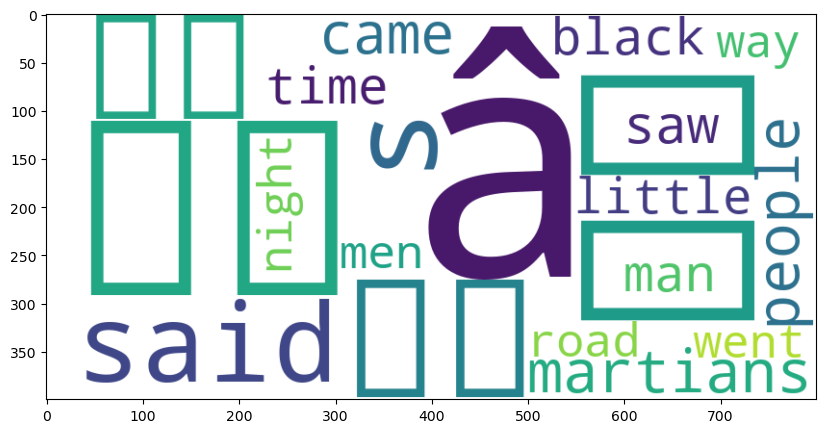

In [13]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

wordcloud = WordCloud(width=800, height = 400, background_color='white').generate_from_frequencies(dict(most_common_tok))

plt.figure(figsize=(10,5))
plt.imshow(wordcloud,interpolation='bilinear')
plt.show()

In [18]:
from nltk.tokenize import WordPunctTokenizer
from collections import Counter
import spacy
import requests 


url = 'http://www.gutenberg.org/files/36/36-0.txt'
result = requests.get(url)


text = result.text[840:].split('*** END')[0]

nlp = spacy.load('en_core_web_sm')

tokens = WordPunctTokenizer().tokenize(text)

sp_tokens = []
for token in tokens:
    spacy_token = nlp(token)[0]
    if not spacy_token.is_stop and not spacy_token.is_punct:
        sp_tokens.append(spacy_token.text.lower())

tokens2 = nlp(" ".join(sp_tokens)) #recrée la liste de tokens avec spacy pour lemmarizer

filtered_tok = [
    token.lemma_.capitalize()
    for token in tokens2
    if not token.is_stop and not token.is_punct and token.lemma_.istitle()
]


[]


In [21]:
most_common_filt_tok = Counter(filtered_tok).most_common(20)

print(most_common_filt_tok)


Counter()


In [25]:
# create document-term matrix
import pandas as pd 
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()

Corpus = [
   '2 cups of flour',
   'replace the flour',
   'replace the keyboard in 2 minutes',
   'do you prefer Windows or Mac',
   'the Mac has the most noisy keyboard',
]

X = vectorizer.fit_transform(Corpus)

vocab = vectorizer.get_feature_names_out()
docterm = pd.DataFrame(X.todense(), columns=vocab)

print(docterm)

   cups  do  flour  has  in  keyboard  mac  minutes  most  noisy  of  or  \
0     1   0      1    0   0         0    0        0     0      0   1   0   
1     0   0      1    0   0         0    0        0     0      0   0   0   
2     0   0      0    0   1         1    0        1     0      0   0   0   
3     0   1      0    0   0         0    1        0     0      0   0   1   
4     0   0      0    1   0         1    1        0     1      1   0   0   

   prefer  replace  the  windows  you  
0       0        0    0        0    0  
1       0        1    1        0    0  
2       0        1    1        0    0  
3       1        0    0        1    1  
4       0        0    2        0    0  


In [26]:
import pandas as pd 
import spacy

url = "https://raw.githubusercontent.com/alexisperrier/intro2nlp/master/data/brown_corpus_extract_humor_science_fiction.csv"
df = pd.read_csv(url)

print(df.topic.value_counts())

topic
humor              1052
science_fiction     948
Name: count, dtype: int64


In [41]:
print(df.head())

             topic                                               text  \
0            humor  They were always leaping to light cigarettes, ...   
1  science_fiction  No, the fish could eat their bodies for all th...   
2  science_fiction  Fighting pleasure itself, he begged B'dikkat t...   
3  science_fiction             that is all I can tell you about them.   
4            humor  That's one thing I've never done  , she said p...   

                                      processed_text  
0  leap light cigarette open car door fill plate ...  
1                          fish eat body Sturch care  
2  fight pleasure beg B'dikkat check record tell ...  
3                                               tell  
4                               thing   say promptly  


In [31]:
nlp = spacy.load('en_core_web_sm')

def lemmatize(text) :
    doc = nlp(text)
    tokens = [token.lemma_ for token in doc if not (token.is_punct or token.is_stop)]
    return tokens

In [32]:
text = "These are the good times, leave your cares behind."
lemmatize(text)

['good', 'time', 'leave', 'care']

In [37]:
nlp = spacy.load('en_core_web_sm')

def lemmatize(text) :
    doc = nlp(text)
    tokens = [token.lemma_ for token in doc if not (token.is_punct or token.is_stop)]
    return ' '.join(tokens)

In [38]:
text = "These are the good times, leave your cares behind."
lemmatize(text)

'good time leave care'

In [39]:
df['processed_text'] = df.text.apply(lambda txt : lemmatize(txt))

In [42]:
df

,topic,text,processed_text
0,humor,"They were always leaping to light cigarettes, ...",leap light cigarette open car door fill plate ...
1,science_fiction,"No, the fish could eat their bodies for all th...",fish eat body Sturch care
2,science_fiction,"Fighting pleasure itself, he begged B'dikkat t...",fight pleasure beg B'dikkat check record tell ...
3,science_fiction,that is all I can tell you about them.,tell
4,humor,"That's one thing I've never done , she said p...",thing say promptly
...,...,...,...
1995,humor,A news item described the launching of a ship ...,news item describe launching ship complete ...
1996,science_fiction,"Time stood still for these people, and their l...",Time stand people load pleasure commingle shoc...
1997,science_fiction,What shall we do with this one??,shall
1998,science_fiction,"But, from our reading of the Western Talmud, w...",reading Western Talmud Urielites believe Forer...


In [45]:
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer()

X = cv.fit_transform(df['processed_text'])
print(X)

  (0, 2538)	1
  (0, 2568)	1
  (0, 783)	1
  (0, 3082)	1
  (0, 662)	1
  (0, 1342)	1
  (0, 1694)	1
  (0, 3301)	1
  (0, 1910)	1
  (0, 2846)	2
  (0, 2629)	1
  (0, 1167)	1
  (0, 360)	2
  (0, 4027)	1
  (0, 637)	1
  (0, 3876)	1
  (0, 4028)	1
  (1, 1714)	1
  (1, 1419)	1
  (1, 518)	1
  (1, 4323)	1
  (1, 665)	1
  (2, 1691)	1
  (2, 3312)	1
  (2, 431)	1
  :	:
  (1996, 2749)	1
  (1996, 1384)	1
  (1996, 4020)	1
  (1996, 3672)	1
  (1996, 872)	1
  (1997, 3990)	1
  (1998, 2486)	1
  (1998, 443)	1
  (1998, 4089)	1
  (1998, 246)	1
  (1998, 3631)	1
  (1998, 3596)	1
  (1998, 3487)	1
  (1998, 1330)	1
  (1998, 1762)	1
  (1998, 4883)	1
  (1998, 4412)	1
  (1998, 4747)	1
  (1999, 518)	1
  (1999, 2497)	1
  (1999, 1108)	1
  (1999, 1754)	1
  (1999, 3357)	1
  (1999, 1761)	1
  (1999, 4740)	1


In [46]:
X

<2000x4999 sparse matrix of type '<class 'numpy.int64'>'
	with 13240 stored elements in Compressed Sparse Row format>

In [48]:
df.loc[df.topic == 'humor', 'topic'] = 0
df.loc[df.topic == 'science_fiction', 'topic'] = 1

y = df.topic.astype(int)

In [49]:
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import MultinomialNB

clf =  MultinomialNB()

clf.fit(X,y)

yhat = clf.predict(X)

print("accuracy", accuracy_score(y, yhat))



accuracy 0.9385


In [50]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()

Corpus = [
    '2 cups of flour',
    'replace the flour',
    'replace the keyboard in 2 minutes',
    'do you prefer Windows or Mac',
    'the Mac has the most noisy keyboard',
]

X =  vectorizer.fit_transform(Corpus)
vocab = vectorizer.get_feature_names_out()
docterm = pd.DataFrame(X.todense(), columns=vocab)

In [51]:
docterm

,cups,do,flour,has,in,keyboard,mac,minutes,most,noisy,of,or,prefer,replace,the,windows,you
0,0.614189,0.000000,0.495524,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.614189,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.000000,0.000000,0.609818,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.609818,0.506204,0.000000,0.000000
2,0.000000,0.000000,0.000000,0.000000,0.516374,0.416607,0.000000,0.516374,0.000000,0.000000,0.000000,0.000000,0.000000,0.416607,0.345822,0.000000,0.000000
3,0.000000,0.420669,0.000000,0.000000,0.000000,0.000000,0.339393,0.000000,0.000000,0.000000,0.000000,0.420669,0.420669,0.000000,0.000000,0.420669,0.420669
4,0.000000,0.000000,0.000000,0.405025,0.000000,0.326771,0.326771,0.000000,0.405025,0.405025,0.000000,0.000000,0.000000,0.000000,0.542500,0.000000,0.000000


In [57]:
from textblob import TextBlob

text = '''That was a narrow escape, Alice said. 
A good deal frightened at the sudden change. 
But very glad to find herself still in existence;
'''

blob = TextBlob(text)

for sentence in blob.sentences :
    print(sentence.raw, sentence.sentiment.polarity, sentence.sentiment.subjectivity)

That was a narrow escape, Alice said. -0.2 0.4
A good deal frightened at the sudden change. 0.35 0.55
But very glad to find herself still in existence; 0.65 1.0


In [58]:
def polarity(text):

   polarity_score = TextBlob(text).sentences[0].sentiment.polarity

   print(f"{text} \t {polarity_score}")


polarity("A good deal frightened at the change.")

polarity("Frightened at the change.")

polarity("Happy at the change.")

polarity("Very frightened at the change.")

A good deal frightened at the change. 	 0.7
Frightened at the change. 	 0.0
Happy at the change. 	 0.8
Very frightened at the change. 	 0.2


In [60]:
import gensim.downloader as api

model = api.load("word2vec-google-news-300")


[==================================================] 100.0% 1662.8/1662.8MB downloaded


In [61]:
print(model['book'])

[ 0.11279297 -0.02612305 -0.04492188  0.06982422  0.140625    0.03039551
 -0.04370117  0.24511719  0.08740234 -0.05053711  0.23144531 -0.07470703
  0.21875     0.03466797 -0.14550781  0.05761719  0.00671387 -0.00701904
  0.13183594 -0.25390625  0.14355469 -0.140625   -0.03564453 -0.21289062
 -0.24804688  0.04980469 -0.09082031  0.14453125  0.05712891 -0.10400391
 -0.19628906 -0.20507812 -0.27539062  0.03063965  0.20117188  0.17382812
  0.09130859 -0.10107422  0.22851562 -0.04077148  0.02709961 -0.00106049
  0.02709961  0.34179688 -0.13183594 -0.078125    0.02197266 -0.18847656
 -0.17480469 -0.05566406 -0.20898438  0.04858398 -0.07617188 -0.15625
 -0.05419922  0.01672363 -0.02722168 -0.11132812 -0.03588867 -0.18359375
  0.28710938  0.01757812  0.02185059 -0.05664062 -0.01251221  0.01708984
 -0.21777344 -0.06787109  0.04711914 -0.00668335  0.08544922 -0.02209473
  0.31835938  0.01794434 -0.02246094 -0.03051758 -0.09570312  0.24414062
  0.20507812  0.05419922  0.29101562  0.03637695  0.04

In [62]:

model.most_similar("book")

[('tome', 0.7485831379890442),
 ('books', 0.7379177808761597),
 ('memoir', 0.7302927374839783),
 ('paperback_edition', 0.6868364214897156),
 ('autobiography', 0.6741527915000916),
 ('memoirs', 0.6505153179168701),
 ('Book', 0.6479282975196838),
 ('paperback', 0.6471226811408997),
 ('novels', 0.6341459155082703),
 ('hardback', 0.6283079981803894)]

In [66]:
model.most_similar("Theva")

[('Nirosha', 0.6376075744628906),
 ('Thilaka', 0.6304511427879333),
 ('Durgabai_Deshmukh', 0.6194510459899902),
 ('Kumudini', 0.6167964339256287),
 ('Barathi', 0.6145066022872925),
 ('Sudhi', 0.6138622164726257),
 ('Pakir', 0.6107293963432312),
 ('Sharmeen', 0.6100481152534485),
 ('Vishvanath', 0.6083383560180664),
 ('Vineetha', 0.606319785118103)]

In [67]:
model.most_similar("Christian")

[('Chrisitan', 0.6609728336334229),
 ('Christain', 0.6461111307144165),
 ('Evangelical_Christian', 0.6290005445480347),
 ('Catholic', 0.6126052141189575),
 ('Chrsitian', 0.599916934967041),
 ('evangelical', 0.5997411012649536),
 ('evangelical_Christian', 0.5964944362640381),
 ('Lutheran', 0.5935071706771851),
 ('Pentecostal', 0.5847637057304382),
 ('Christians', 0.5816546678543091)]

In [70]:
model.most_similar("Cécile")

[('Hélène', 0.7253410816192627),
 ('François', 0.7059300541877747),
 ('Nathalie', 0.6992667317390442),
 ('Françoise', 0.6947883367538452),
 ('Stéphanie', 0.6941261887550354),
 ('Mélanie', 0.6835232973098755),
 ('Emmanuelle', 0.6791843175888062),
 ('Gérald', 0.6779244542121887),
 ('Valérie', 0.6776031851768494),
 ('Béatrice', 0.6771715879440308)]

In [71]:
model.most_similar("Tokyo")

[('Osaka', 0.7306584119796753),
 ('Toyko', 0.7298397421836853),
 ('Nagoya', 0.7041050791740417),
 ('Japan', 0.7002254128456116),
 ('Seoul', 0.693085253238678),
 ('Japanese', 0.6552055478096008),
 ('Yokohama', 0.653999924659729),
 ('Maebashi', 0.6536250114440918),
 ('Chiyoda_Ward', 0.6499732732772827),
 ('Tochigi_prefecture_north', 0.6470677852630615)]

In [72]:
# setup the environnement 

import urllib
import re
import urllib.request 


url = 'https://raw.githubusercontent.com/alexisperrier/intro2nlp/master/data/Shakespeare_alllines.txt'
lines = urllib.request.urlopen(url).read().decode('utf-8').split("\n")

In [75]:
lines

['"ACT I"',
 '"SCENE I. London. The palace."',
 '"Enter KING HENRY, LORD JOHN OF LANCASTER, the EARL of WESTMORELAND, SIR WALTER BLUNT, and others"',
 '"So shaken as we are, so wan with care,"',
 '"Find we a time for frighted peace to pant,"',
 '"And breathe short-winded accents of new broils"',
 '"To be commenced in strands afar remote."',
 '"No more the thirsty entrance of this soil"',
 '"Shall daub her lips with her own children\'s blood,"',
 '"Nor more shall trenching war channel her fields,"',
 '"Nor bruise her flowerets with the armed hoofs"',
 '"Of hostile paces: those opposed eyes,"',
 '"Which, like the meteors of a troubled heaven,"',
 '"All of one nature, of one substance bred,"',
 '"Did lately meet in the intestine shock"',
 '"And furious close of civil butchery"',
 '"Shall now, in mutual well-beseeming ranks,"',
 '"March all one way and be no more opposed"',
 '"Against acquaintance, kindred and allies:"',
 '"The edge of war, like an ill-sheathed knife,"',
 '"No more shall c

In [73]:
sentences = []
for line in lines :
   line = re.sub(r'[\!"#$%&\*+,-:;<=>?@^_()|~=]','',line).strip()

   tokens = re.findall(r'\b\w+\b', line)

   if len(tokens) > 1 :
      sentences.append(tokens)

In [85]:
sentences

[['ACT', 'I'],
 ['SCENE', 'I', 'London', 'The', 'palace'],
 ['Enter',
  'KING',
  'HENRY',
  'LORD',
  'JOHN',
  'OF',
  'LANCASTER',
  'the',
  'EARL',
  'of',
  'WESTMORELAND',
  'SIR',
  'WALTER',
  'BLUNT',
  'and',
  'others'],
 ['So', 'shaken', 'as', 'we', 'are', 'so', 'wan', 'with', 'care'],
 ['Find', 'we', 'a', 'time', 'for', 'frighted', 'peace', 'to', 'pant'],
 ['And', 'breathe', 'shortwinded', 'accents', 'of', 'new', 'broils'],
 ['To', 'be', 'commenced', 'in', 'strands', 'afar', 'remote'],
 ['No', 'more', 'the', 'thirsty', 'entrance', 'of', 'this', 'soil'],
 ['Shall',
  'daub',
  'her',
  'lips',
  'with',
  'her',
  'own',
  'children',
  's',
  'blood'],
 ['Nor', 'more', 'shall', 'trenching', 'war', 'channel', 'her', 'fields'],
 ['Nor', 'bruise', 'her', 'flowerets', 'with', 'the', 'armed', 'hoofs'],
 ['Of', 'hostile', 'paces', 'those', 'opposed', 'eyes'],
 ['Which', 'like', 'the', 'meteors', 'of', 'a', 'troubled', 'heaven'],
 ['All', 'of', 'one', 'nature', 'of', 'one', 'sub

In [74]:
from gensim.models import Word2Vec

bard2vec = Word2Vec(
    sentences,
    min_count =3,
    vector_size=50,
    sg = 1,
    window=7,
    epochs=40
)

In [87]:
import requests
import re 

url = 'https://en.wikipedia.org/wiki/House_music'
html = requests.get(url).content.decode('utf-8')
html = html.split('</head>')[1]

In [88]:
html

'\n<body class="skin--responsive skin-vector skin-vector-search-vue mediawiki ltr sitedir-ltr mw-hide-empty-elt ns-0 ns-subject mw-editable page-House_music rootpage-House_music skin-vector-2022 action-view"><a class="mw-jump-link" href="#bodyContent">Jump to content</a>\n<div class="vector-header-container">\n\t<header class="vector-header mw-header">\n\t\t<div class="vector-header-start">\n\t\t\t<nav class="vector-main-menu-landmark" aria-label="Site">\n\t\t\t\t\n<div id="vector-main-menu-dropdown" class="vector-dropdown vector-main-menu-dropdown vector-button-flush-left vector-button-flush-right"  >\n\t<input type="checkbox" id="vector-main-menu-dropdown-checkbox" role="button" aria-haspopup="true" data-event-name="ui.dropdown-vector-main-menu-dropdown" class="vector-dropdown-checkbox "  aria-label="Main menu"  >\n\t<label id="vector-main-menu-dropdown-label" for="vector-main-menu-dropdown-checkbox" class="vector-dropdown-label cdx-button cdx-button--fake-button cdx-button--fake-but

In [91]:
text = re.sub("<[^>]*>",' ', html)

In [92]:
text

'\n  Jump to content \n \n\t \n\t\t \n\t\t\t \n\t\t\t\t\n \n\t \n\t   \n\n Main menu \n\t \n\t \n\n\n\t\t\t\t \n\t\t\n \n\t \n\t Main menu \n\t move to sidebar \n\t hide \n \n\n\t\n \n\t \n\t\tNavigation\n\t \n\t \n\t\t\n\t\t \n\t\t\t\n\t\t\t   Main page      Contents      Current events      Random article      About Wikipedia      Contact us      Donate   \n\t\t \n\t\t\n\t \n \n\n\t\n\t\n \n\t \n\t\tContribute\n\t \n\t \n\t\t\n\t\t \n\t\t\t\n\t\t\t   Help      Learn to edit      Community portal      Recent changes      Upload file   \n\t\t \n\t\t\n\t \n \n\n \n\n\t\t\t\t \n\n\t \n \n\n\t\t \n\t\t\t\n \n\t \n\t \n\t\t \n\t\t \n\t \n \n\n\t\t \n\t\t \n\t\t\t\n \n\t   \n\n Search \n\t \n\t \n\t\t \n\t\t\t \n\t\t\t\t \n\t\t\t\t\t \n\t\t\t\t\t\t \n\t\t\t\t\t\t  \n\t\t\t\t\t \n\t\t\t\t\t \n\t\t\t\t \n\t\t\t\t Search \n\t\t\t \n\t\t \n\t \n \n\n\t\t\t \n\t \n\t\n \n\t \n\t\t\n\t\t \n\t\t\t\n\t\t\t\n\t\t \n\t\t\n\t \n \n\n\t\n \n\t \n\t\t\n\t\t \n\t\t\t\n\t\t\t\n\t\t \n\t\t\n\t \n \n\n\t \n